# Linear and Ridge Regression

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
np.random.seed(42)

### Data

In [21]:
def get_data(n):
        
    x = np.random.uniform(0,2, n)
    X = np.expand_dims(x, axis=-1)
    y = 2 * np.sin(2*x) + 0.1*np.random.normal(0, 2, n)
    Y = np.expand_dims(y, axis=-1)
    
    return X, Y

In [22]:
X, Y = get_data(100)

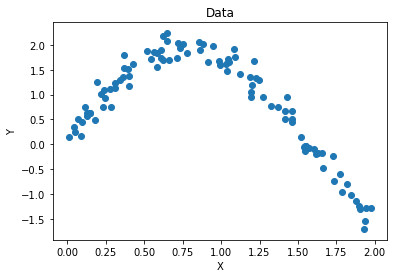

In [23]:
fig = plt.figure()
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data")
plt.show()

### Ridge Regression

In [24]:
def ridge_regression(X, Y, lam=1,use_bias = True):
    if use_bias:
        X = np.append(X,np.ones((X.shape[0],1)), axis=1)
    n = X.shape[0]
    d = X.shape[1]
    Xt = np.transpose(X)
    bracket = np.dot(Xt,X) + n*lam * np.identity(d) 
    inverse = np.linalg.inv(bracket)
    
    return np.dot(np.dot(inverse,Xt),Y)


In [25]:
def linear_model(X,w,use_bias = True):
    if use_bias:
        X = np.append(X,np.ones((X.shape[0],1)), axis=1)
    Y_pred = np.dot(X,w)
    return Y_pred

[0.73319939535004164, 1.1607530588072765, 1.5293144638369105]


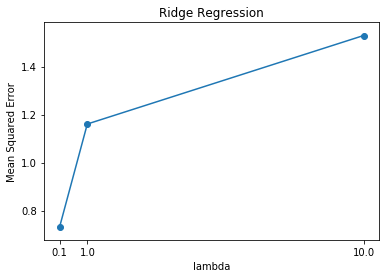

In [26]:
MSEs = []
Y_preds = []
lams = [0.1,1,10]
for lam in lams:   
    w = ridge_regression(X,Y,lam)
    Y_pred = linear_model(X,w)  
    mse = mean_squared_error(Y,Y_pred)
    MSEs.append(mse)
    Y_preds.append(Y_pred)

print(MSEs)

fig = plt.figure()
plt.scatter(lams, MSEs)
plt.plot(lams, MSEs)
plt.title("Ridge Regression")
plt.xlabel("lambda")
plt.ylabel("Mean Squared Error")
plt.xticks(lams)
plt.show()

Models with smaller $\lambda$ have smaller MSEs and perform better on the training set they are fitted on. This is what we expected, because taking a regularizer term into account controls overfitting. 

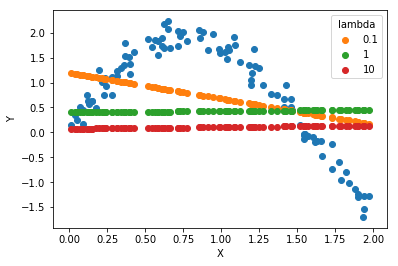

In [27]:
fig = plt.figure()
plt.scatter(X, Y,)
for i,Y_pred in enumerate(Y_preds):
    plt.scatter(X,Y_pred,label = lams[i])
plt.legend(title="lambda")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [28]:
X_1 = np.ones(X.shape)
X_squared = np.square(X)

X_basis = np.column_stack((X_1,X,X_squared))

lams = [0.001, 0.01, 0.1, 1, 10]

MSEs = []
Y_preds = np.zeros((len(lams),X.shape[0],1))


for j,lam in enumerate(lams):
    w = ridge_regression(X_basis,Y,lam)      
    Y_pred = linear_model(X_basis,w)
    mse = mean_squared_error(Y,Y_pred)
    MSEs.append(mse)
    Y_preds[j] = Y_pred   

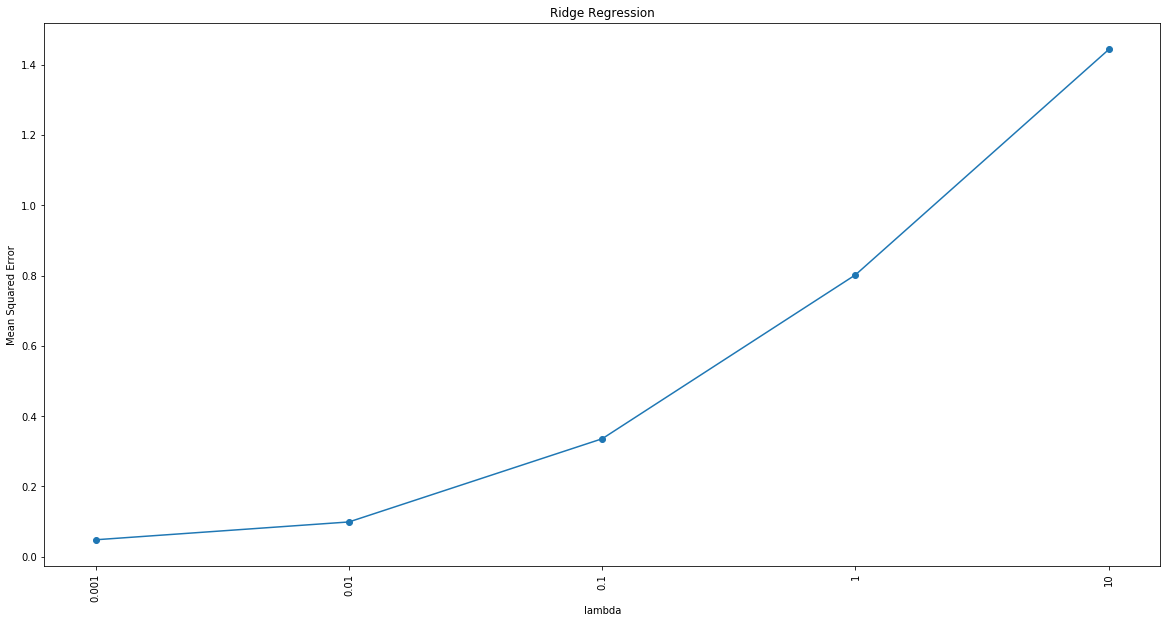

In [29]:
fig = plt.figure()
plt.figure(figsize=(20,10))
xi = [i for i in range(0, len(lams))]
plt.scatter(xi, MSEs)
plt.plot(xi, MSEs)
plt.title("Ridge Regression")
plt.xlabel("lambda")
plt.ylabel("Mean Squared Error")
plt.xticks(xi,lams,rotation = 90)
plt.show()

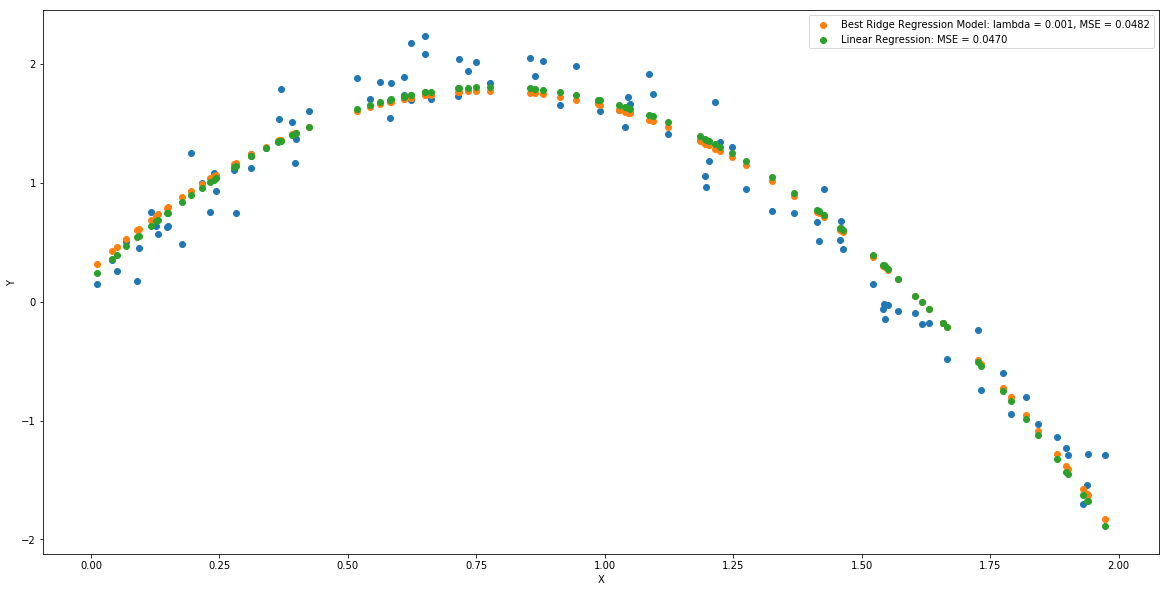

In [30]:
best_model_index = MSEs.index(min(MSEs))

Y_pred_best = Y_preds[best_model_index]
w_zero = ridge_regression(X_basis,Y,0,use_bias=False) # with bias Matrix singular
Y_pred_zero = linear_model(X_basis,w_zero,use_bias=False)
MSE_zero = mean_squared_error(Y,Y_pred_zero)


fig = plt.figure()
plt.figure(figsize=(20,10))
plt.scatter(X, Y)
plt.scatter(X,Y_pred_best[:,0],label = "Best Ridge Regression Model: lambda = %.3f, MSE = %.4f" % ( lams[best_model_index],MSEs[best_model_index] ))
plt.scatter(X,Y_pred_zero[:,0],label = "Linear Regression: MSE = %.4f" % MSE_zero)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

The best prediction is made by a model with $\lambda = 0.001$. Setting $\lambda = 0$ results in quite similar predictions the MSE is bit smaller. Setting the regularizer term to zero bears the danger of overfitting on the training data. 

In [31]:
X_test, Y_test = get_data(20)
X_test_1 = np.ones(X_test.shape)
X_test_squared = np.square(X_test)

X_basis_test = np.column_stack((X_test_1,X_test,X_test_squared))

lams = [0,0.001, 0.01, 0.1]

MSEs = []
Y_preds = np.zeros((len(lams),X_test.shape[0],1))


for i,lam in enumerate(lams):
    if i == 0:
        try:
            w_zero = ridge_regression(X_basis,Y,0,use_bias=False)
            Y_pred = linear_model(X_basis_test,w_zero,use_bias=False)
            mse = mean_squared_error(Y_test,Y_pred)
            MSEs.append(mse)
            Y_preds[i] = Y_pred
        except:
            print("Error because of singular matrix" )
    else:
        w = ridge_regression(X_basis,Y,lam)
        Y_pred = linear_model(X_basis_test,w)
        mse = mean_squared_error(Y_test,Y_pred)
        MSEs.append(mse)
        Y_preds[i] = Y_pred 

 

Linear interpolation

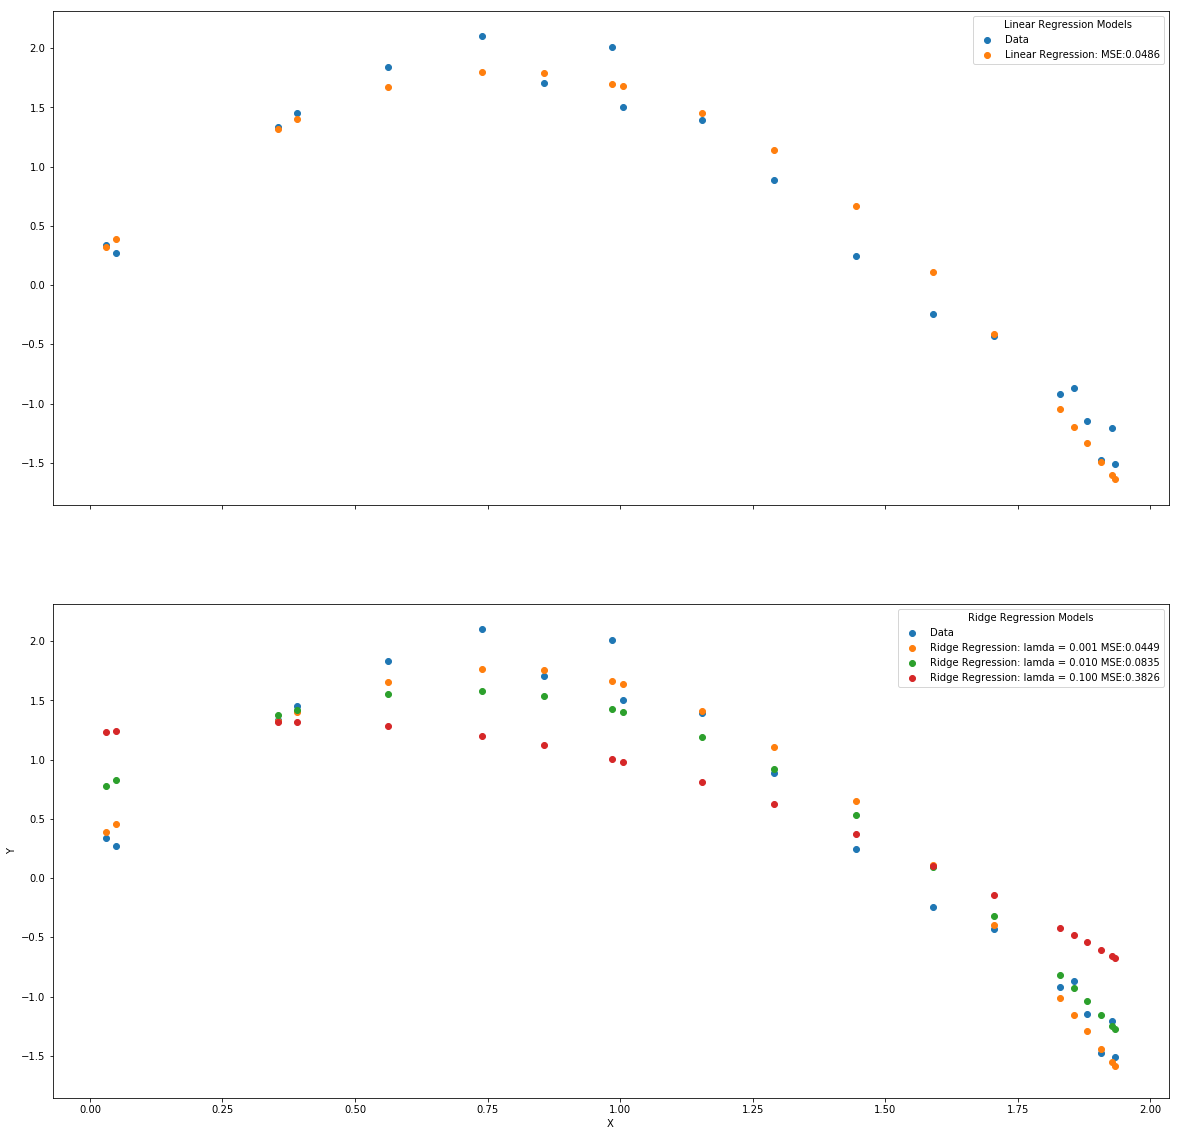

In [32]:
lams = [0,0.001, 0.01, 0.1]
fig, (ax1,ax2) = plt.subplots(2, sharex=True, sharey=True,figsize=(20,20))
ax1.scatter(X_test, Y_test, label = "Data")
ax2.scatter(X_test, Y_test, label = "Data")

for j, y_pred_lam in enumerate(Y_preds):
    if(j==0):
        ax1.scatter(X_test,y_pred_lam, label="Linear Regression: MSE:%.4f" % (MSEs[j]))
    else:
        ax2.scatter(X_test,y_pred_lam, label="Ridge Regression: lamda = %.3f MSE:%.4f" % (lams[j],MSEs[j]))

ax2.legend(title= "Ridge Regression Models")
ax1.legend(title = "Linear Regression Models")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

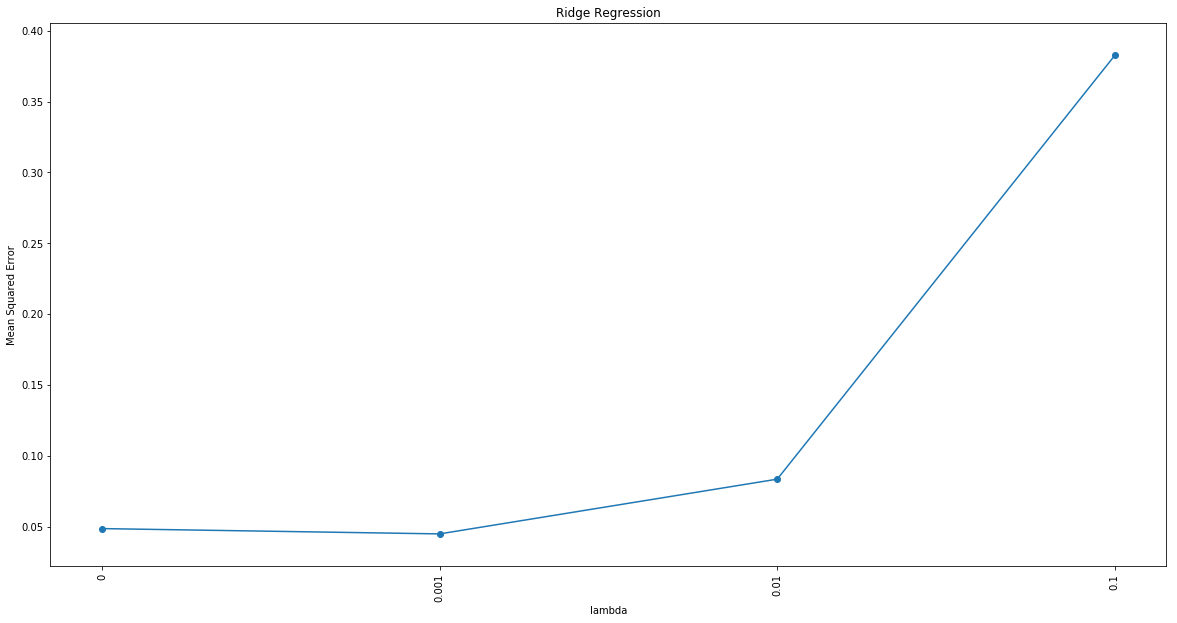

In [33]:
fig = plt.figure()
plt.figure(figsize=(20,10))
xi = [i for i in range(0, len(lams))]
plt.scatter(xi, MSEs)
plt.plot(xi, MSEs)
plt.title("Ridge Regression")
plt.xlabel("lambda")
plt.ylabel("Mean Squared Error")
plt.xticks(xi,lams,rotation = 90)
plt.show()

Comparing the results, you can conclude that the best performing model is the one using standard linear regression. As before on the training data set it has the lowest MSE. While we had the fear of overfitting on the training set, the predictions on the test set show, that the standard linear regression learned the underlying structure best. 

In [34]:
X = np.random.uniform(0,2, (100, 2))
Y = 2 * (X[:, 0]**2) + X[:, 1] + 1 + 0.1 * np.random.normal(0, 1, 100)

In [35]:
one = np.ones((X.shape[0],1))
X_1 = X[:,0]
X_1_squared = X[:,0]**2
X_2 = X[:,1]
X_2_squared = X[:,1]**2
X_1X_2 = X[:,0] *X[:,1]



X_basis = np.column_stack((one,X_1,X_1_squared,X_2,X_2_squared,X_1X_2))
lams = [0.001, 0.01, 0.1, 1, 10]

MSEs = []
Y_preds = np.zeros((len(lams),X.shape[0]))

for i,lam in enumerate(lams):
    w = ridge_regression(X_basis,Y,lam)
    Y_pred = linear_model(X_basis,w)
    mse = mean_squared_error(Y,Y_pred)
    MSEs.append(mse)
    Y_preds[i] = Y_pred 
        


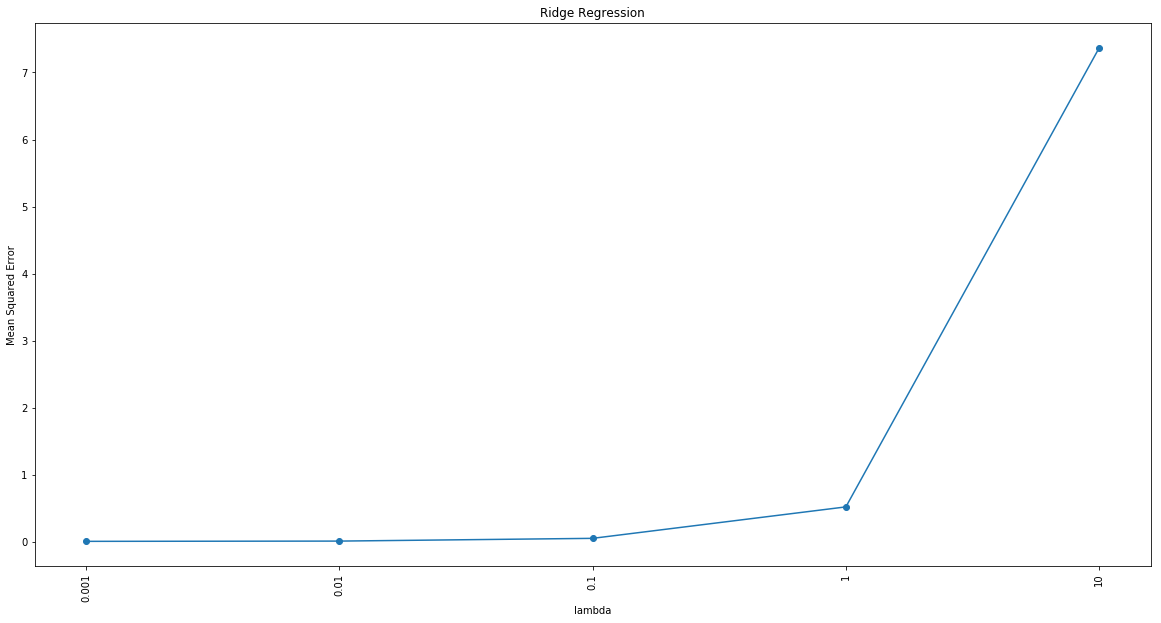

In [36]:
fig = plt.figure()
plt.figure(figsize=(20,10))
xi = [i for i in range(0, len(lams))]
plt.scatter(xi, MSEs)
plt.plot(xi, MSEs)
plt.title("Ridge Regression")
plt.xlabel("lambda")
plt.ylabel("Mean Squared Error")
plt.xticks(xi,lams,rotation = 90)
plt.show()

As in the analysis before smaller lambda performs better. 